In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('data.csv')

Benign 357
Malignanat 212


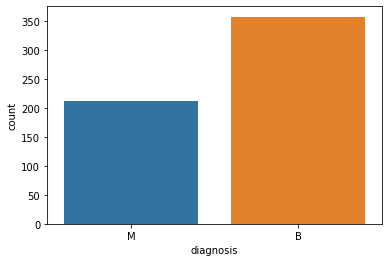

In [3]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)

In [4]:
# Importing data
del data['Unnamed: 32']

In [5]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [7]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:
#adding the input and first hidden layer
classifier = Sequential()
#adding the 1st hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))
#adding the 2nd hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))
#adding the 3rd hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))
#adding the 4th hidden layer
classifier.add(Dense(1,activation='sigmoid'))

In [10]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 1s 2ms/step - loss: 0.7629 - accuracy: 0.3626
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7472 - accuracy: 0.3626
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7315 - accuracy: 0.3626
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7199 - accuracy: 0.3626
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7076 - accuracy: 0.3626
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4418
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.6374
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6374
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6374
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6374
Epoch 11/150
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.8879
Epoch 85/150
5/5 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.8945
Epoch 86/150
5/5 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.9011
Epoch 87/150
5/5 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.9077
Epoch 88/150
5/5 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.9121
Epoch 89/150
5/5 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.9143
Epoch 90/150
5/5 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.9165
Epoch 91/150
5/5 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.9187
Epoch 92/150
5/5 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.9253
Epoch 93/150
5/5 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.9275
Epoch 94/150
5/5 [===============

In [12]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 1ms/step


In [14]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

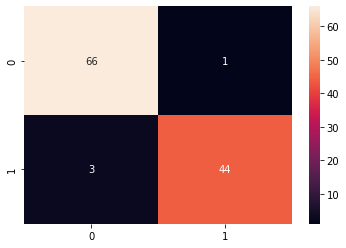

In [15]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')


In [16]:
(66+43)/(66+43+4+1)

0.956140350877193

## Cross Validation

In [17]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [18]:
def CV_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [19]:
classifier = KerasClassifier(build_fn = CV_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)

In [20]:
accuracies

array([0.97826087, 1.        , 0.97826087, 0.97826087, 0.95652175,
       0.95555556, 0.97777778, 1.        , 0.5777778 , 1.        ])

In [21]:
accuracies.mean()

0.9402415513992309

In [22]:
accuracies.std()

0.12179413958398966

# Parameter Optimization

In [23]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [24]:
def PO_classifier(optimizer = 'adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [25]:
classifier = KerasClassifier(build_fn = PO_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',cv = 10)

In [26]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 0.7335 - accuracy: 0.6235
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6235
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.6235
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.6235
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.6235
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5771 - accuracy: 0.6235
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5620 - accuracy: 0.6235
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.6748
Epoch 9/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.8142
Epoch 10/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.9022
Epoch 11/

41/41 [==============================] - 0s 1ms/step - loss: 0.0673 - accuracy: 0.9853
Epoch 84/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9853
Epoch 85/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9853
Epoch 86/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9853
Epoch 87/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.9853
Epoch 88/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0629 - accuracy: 0.9853
Epoch 89/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0623 - accuracy: 0.9853
Epoch 90/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9853
Epoch 91/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0603 - accuracy: 0.9853
Epoch 92/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9853
Epoch 93/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9902
Epoch 65/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9902
Epoch 66/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0705 - accuracy: 0.9902
Epoch 67/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9902
Epoch 68/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9902
Epoch 69/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0678 - accuracy: 0.9902
Epoch 70/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.9902
Epoch 71/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 0.9902
Epoch 72/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.9902
Epoch 73/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.9902
Epoch 74/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9902
Epoch 46/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.9902
Epoch 47/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9902
Epoch 48/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9902
Epoch 49/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9902
Epoch 50/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9902
Epoch 51/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9902
Epoch 52/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 0.9902
Epoch 53/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9902
Epoch 54/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9902
Epoch 55/100


41/41 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.9902
Epoch 27/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.9902
Epoch 28/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9902
Epoch 29/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.9902
Epoch 30/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9902
Epoch 31/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9902
Epoch 32/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.9902
Epoch 33/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9902
Epoch 34/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9902
Epoch 35/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9902
Epoch 36/100


2/2 [==============================] - 0s 2ms/step
Epoch 1/100
41/41 [==============================] - 1s 1ms/step - loss: 0.6963 - accuracy: 0.5110
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.6381
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.6381
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6253 - accuracy: 0.6381
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6161 - accuracy: 0.6381
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6090 - accuracy: 0.6381
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.6381
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.6381
Epoch 9/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5864 - accuracy: 0.6381
Epoch 10/100
41/41 [==============================] - 0s 1

41/41 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9951
Epoch 83/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9951
Epoch 84/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9951
Epoch 85/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9951
Epoch 86/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9951
Epoch 87/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9951
Epoch 88/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.9951
Epoch 89/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 0.9951
Epoch 90/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 0.9951
Epoch 91/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9951
Epoch 92/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9927
Epoch 57/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9927
Epoch 58/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9927
Epoch 59/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9927
Epoch 60/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9927
Epoch 61/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9927
Epoch 62/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9927
Epoch 63/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9927
Epoch 64/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9927
Epoch 65/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9927
Epoch 66/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0760 - accuracy: 0.9902
Epoch 38/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9902
Epoch 39/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9902
Epoch 40/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9902
Epoch 41/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9902
Epoch 42/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9902
Epoch 43/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0678 - accuracy: 0.9902
Epoch 44/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9902
Epoch 45/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 0.9902
Epoch 46/100
41/41 [==============================] - 0s 975us/step - loss: 0.0650 - accuracy: 0.9902
Epoch 47/10

41/41 [==============================] - 0s 1ms/step - loss: 0.3674 - accuracy: 0.9610
Epoch 19/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.9707
Epoch 20/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.9707
Epoch 21/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3056 - accuracy: 0.9707
Epoch 22/100
41/41 [==============================] - 0s 925us/step - loss: 0.2866 - accuracy: 0.9707
Epoch 23/100
41/41 [==============================] - 0s 950us/step - loss: 0.2684 - accuracy: 0.9732
Epoch 24/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2518 - accuracy: 0.9756
Epoch 25/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2358 - accuracy: 0.9805
Epoch 26/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2214 - accuracy: 0.9829
Epoch 27/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2079 - accuracy: 0.9854
Epoch 28/

41/41 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 100/100
2/2 [==============================] - 0s 2ms/step
Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.6439
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6439
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.6439
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.6439
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.6439
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7537
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.9366
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.9659
Epoch 9/100
41/41 [==============================] - 0s 

41/41 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 81/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 82/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 83/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 84/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 85/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 86/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 87/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 88/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 89/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 90/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9902
Epoch 62/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9902
Epoch 63/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9902
Epoch 64/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0713 - accuracy: 0.9902
Epoch 65/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9902
Epoch 66/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9902
Epoch 67/100
41/41 [==============================] - 0s 975us/step - loss: 0.0682 - accuracy: 0.9902
Epoch 68/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0673 - accuracy: 0.9902
Epoch 69/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9902
Epoch 70/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9902
Epoch 71/10

41/41 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9878
Epoch 43/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9878
Epoch 44/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9878
Epoch 45/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9902
Epoch 46/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9902
Epoch 47/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0713 - accuracy: 0.9902
Epoch 48/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0702 - accuracy: 0.9902
Epoch 49/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0693 - accuracy: 0.9902
Epoch 50/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9902
Epoch 51/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.9902
Epoch 52/100


41/41 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.9878
Epoch 24/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9878
Epoch 25/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9878
Epoch 26/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9878
Epoch 27/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9878
Epoch 28/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9878
Epoch 29/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9878
Epoch 30/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 0.9878
Epoch 31/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9878
Epoch 32/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.9878
Epoch 33/100


41/41 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.6406
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5790 - accuracy: 0.6406
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5640 - accuracy: 0.6406
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.6406
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5323 - accuracy: 0.6406
Epoch 9/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.6406
Epoch 10/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.6406
Epoch 11/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.6406
Epoch 12/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.6406
Epoch 13/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7311
Epoch 14/100
41/41

41/41 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9902
Epoch 87/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0582 - accuracy: 0.9902
Epoch 88/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9902
Epoch 89/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9902
Epoch 90/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9902
Epoch 91/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9902
Epoch 92/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9902
Epoch 93/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0568 - accuracy: 0.9902
Epoch 94/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9902
Epoch 95/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9902
Epoch 96/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9902
Epoch 68/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.9902
Epoch 69/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 70/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9927
Epoch 71/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9902
Epoch 72/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 73/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9927
Epoch 74/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9927
Epoch 75/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9927
Epoch 76/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9927
Epoch 77/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9927
Epoch 49/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9927
Epoch 50/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9927
Epoch 51/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9927
Epoch 52/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9927
Epoch 53/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9927
Epoch 54/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9927
Epoch 55/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9951
Epoch 56/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9951
Epoch 57/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9951
Epoch 58/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9927
Epoch 30/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 0.9927
Epoch 31/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9927
Epoch 32/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9927
Epoch 33/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9927
Epoch 34/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9927
Epoch 35/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9927
Epoch 36/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9927
Epoch 37/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9927
Epoch 38/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9927
Epoch 39/100


41/41 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.6390
Epoch 11/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.6390
Epoch 12/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.6390
Epoch 13/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.6634
Epoch 14/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.8829
Epoch 15/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.9195
Epoch 16/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.9341
Epoch 17/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.9366
Epoch 18/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.9512
Epoch 19/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.9610
Epoch 20/100


Epoch 92/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.9902
Epoch 93/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.9902
Epoch 94/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.9902
Epoch 95/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9902
Epoch 96/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.9902
Epoch 97/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9902
Epoch 98/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 99/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 100/100
2/2 [==============================] - 0s 1ms/step
Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.6415
Epoch 2/100
41/41 [=================

41/41 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9902
Epoch 74/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.9902
Epoch 75/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 76/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 77/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 78/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 79/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 80/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 81/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 82/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 83/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9878
Epoch 55/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9878
Epoch 56/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9878
Epoch 57/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9878
Epoch 58/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9878
Epoch 59/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9878
Epoch 60/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9878
Epoch 61/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9878
Epoch 62/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9878
Epoch 63/100
41/41 [==============================] - 0s 975us/step - loss: 0.0806 - accuracy: 0.9878
Epoch 64/10

41/41 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9878
Epoch 36/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9878
Epoch 37/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9878
Epoch 38/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9878
Epoch 39/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9902
Epoch 40/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9902
Epoch 41/100
41/41 [==============================] - 0s 975us/step - loss: 0.0739 - accuracy: 0.9902
Epoch 42/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9902
Epoch 43/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9902
Epoch 44/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9902
Epoch 45/10

41/41 [==============================] - 0s 1ms/step - loss: 0.2881 - accuracy: 0.9756
Epoch 17/500
41/41 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.9780
Epoch 18/500
41/41 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.9829
Epoch 19/500
41/41 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9853
Epoch 20/500
41/41 [==============================] - 0s 2ms/step - loss: 0.2164 - accuracy: 0.9853
Epoch 21/500
41/41 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9853
Epoch 22/500
41/41 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.9878
Epoch 23/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9878
Epoch 24/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9878
Epoch 25/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1583 - accuracy: 0.9878
Epoch 26/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 98/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9902
Epoch 99/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9902
Epoch 100/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9902
Epoch 101/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9902
Epoch 102/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 103/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 104/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 105/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 106/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 

41/41 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9902
Epoch 179/500
41/41 [==============================] - 0s 975us/step - loss: 0.0515 - accuracy: 0.9878
Epoch 180/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9902
Epoch 181/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9878
Epoch 182/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9878
Epoch 183/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9902
Epoch 184/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.9927
Epoch 185/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9927
Epoch 186/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 0.9927
Epoch 187/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 0.9927
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 260/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 261/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 262/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 263/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 264/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 265/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 266/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 267/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 268/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9976
Epoch 341/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9976
Epoch 342/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9976
Epoch 343/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9976
Epoch 344/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9976
Epoch 345/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9976
Epoch 346/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.9976
Epoch 347/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9976
Epoch 348/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9976
Epoch 349/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9976
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9976
Epoch 422/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9976
Epoch 423/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9976
Epoch 424/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9976
Epoch 425/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9976
Epoch 426/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9976
Epoch 427/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9976
Epoch 428/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9976
Epoch 429/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9976
Epoch 430/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9976
Epoc

41/41 [==============================] - 1s 2ms/step - loss: 0.7006 - accuracy: 0.4841
Epoch 2/500
41/41 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6406
Epoch 3/500
41/41 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.6406
Epoch 4/500
41/41 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.6406
Epoch 5/500
41/41 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6406
Epoch 6/500
41/41 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.6406
Epoch 7/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.6406
Epoch 8/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5687 - accuracy: 0.6406
Epoch 9/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.6406
Epoch 10/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.6406
Epoch 11/500
41/41 [=

41/41 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9902
Epoch 84/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9902
Epoch 85/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9902
Epoch 86/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9902
Epoch 87/500
41/41 [==============================] - 0s 6ms/step - loss: 0.0578 - accuracy: 0.9902
Epoch 88/500
41/41 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.9902
Epoch 89/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9902
Epoch 90/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9902
Epoch 91/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9902
Epoch 92/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9902
Epoch 93/500


41/41 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 165/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 166/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 167/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 168/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 169/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 170/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 171/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 172/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 173/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 246/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 247/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 248/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 249/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 250/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 251/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 252/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 253/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 254/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 327/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 328/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 329/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 330/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 331/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 332/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 333/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 334/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 335/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 408/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 409/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 410/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 411/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 412/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 413/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 414/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 415/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 416/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 489/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 490/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 491/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 492/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 493/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 494/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 495/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 496/500
41/41 [==============================] - 0s 975us/step - loss: 0.0508 - accuracy: 0.9902
Epoch 497/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.9902
Epoch 70/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9902
Epoch 71/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9902
Epoch 72/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.9902
Epoch 73/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 74/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 75/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 76/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 77/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 78/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 79/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 151/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 152/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 153/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 154/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 155/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 156/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 157/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 158/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 159/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 232/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 233/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 234/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 235/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 236/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 237/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 238/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 239/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 240/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 313/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 314/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 315/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 316/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 317/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 318/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 319/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 320/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 321/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 394/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 395/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 396/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 397/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 398/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 399/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 400/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9902
Epoch 401/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9902
Epoch 402/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 475/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 476/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 477/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 478/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 479/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 480/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 481/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 482/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 483/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.9902
Epoch 56/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9902
Epoch 57/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9902
Epoch 58/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9927
Epoch 59/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9927
Epoch 60/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9927
Epoch 61/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9927
Epoch 62/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0627 - accuracy: 0.9927
Epoch 63/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9927
Epoch 64/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9927
Epoch 65/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9927
Epoch 137/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9927
Epoch 138/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9927
Epoch 139/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9927
Epoch 140/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9927
Epoch 141/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9927
Epoch 142/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9927
Epoch 143/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9927
Epoch 144/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9927
Epoch 145/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 218/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 219/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 220/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 221/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 222/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 223/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 224/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 225/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 226/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 299/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 300/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 301/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 302/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 303/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 304/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 305/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 306/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 307/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 380/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 381/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 382/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 383/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 384/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 385/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 386/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 387/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 388/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 461/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 462/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 463/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 464/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 465/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 466/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 467/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 468/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 469/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9927
Epoch 42/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1164 - accuracy: 0.9927
Epoch 43/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9927
Epoch 44/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.9927
Epoch 45/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9927
Epoch 46/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9927
Epoch 47/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9927
Epoch 48/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9927
Epoch 49/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.9927
Epoch 50/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9927
Epoch 51/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9951
Epoch 123/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9951
Epoch 124/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9951
Epoch 125/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9951
Epoch 126/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.9951
Epoch 127/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0312 - accuracy: 0.9951
Epoch 128/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9951
Epoch 129/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9951
Epoch 130/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9951
Epoch 131/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 204/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 205/500
41/41 [==============================] - 0s 975us/step - loss: 0.0293 - accuracy: 0.9951
Epoch 206/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 207/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 208/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 209/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 210/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 211/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 212/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 285/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 286/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 287/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 288/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 289/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 290/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 291/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 292/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 293/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 366/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 367/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 368/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 369/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 370/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 371/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 372/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 373/500
41/41 [==============================] - 0s 975us/step - loss: 0.0288 - accuracy: 0.9951
Epoch 374/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 447/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 448/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 449/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 450/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 451/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 452/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 453/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 454/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 455/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.9927
Epoch 28/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9927
Epoch 29/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9927
Epoch 30/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9927
Epoch 31/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9927
Epoch 32/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9927
Epoch 33/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0713 - accuracy: 0.9927
Epoch 34/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9927
Epoch 35/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9927
Epoch 36/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9927
Epoch 37/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9951
Epoch 109/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9951
Epoch 110/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9951
Epoch 111/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.9951
Epoch 112/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.9951
Epoch 113/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9951
Epoch 114/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9951
Epoch 115/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9951
Epoch 116/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9951
Epoch 117/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 190/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 191/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 192/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 193/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 194/500
41/41 [==============================] - 0s 950us/step - loss: 0.0296 - accuracy: 0.9951
Epoch 195/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 196/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 197/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 198/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 271/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 272/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 273/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 274/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 275/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 276/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 277/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 278/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 279/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 352/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 353/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 354/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 355/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 356/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 357/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 358/500
41/41 [==============================] - 0s 950us/step - loss: 0.0288 - accuracy: 0.9951
Epoch 359/500
41/41 [==============================] - 0s 925us/step - loss: 0.0288 - accuracy: 0.9951
Epoch 360/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951


41/41 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.9951
Epoch 433/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9951
Epoch 434/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9951
Epoch 435/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9951
Epoch 436/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 0.9951
Epoch 437/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9951
Epoch 438/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9976
Epoch 439/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9951
Epoch 440/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9976
Epoch 441/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.3226 - accuracy: 0.9805
Epoch 13/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.9829
Epoch 14/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.9829
Epoch 15/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2637 - accuracy: 0.9829
Epoch 16/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2487 - accuracy: 0.9829
Epoch 17/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.9829
Epoch 18/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.9878
Epoch 19/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2114 - accuracy: 0.9878
Epoch 20/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.9878
Epoch 21/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 0.9878
Epoch 22/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9902
Epoch 95/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0612 - accuracy: 0.9902
Epoch 96/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9902
Epoch 97/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9902
Epoch 98/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0606 - accuracy: 0.9902
Epoch 99/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9902
Epoch 100/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0601 - accuracy: 0.9902
Epoch 101/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.9902
Epoch 102/500
41/41 [==============================] - 0s 950us/step - loss: 0.0598 - accuracy: 0.9902
Epoch 103/500
41/41 [==============================] - 0s 975us/step - loss: 0.0596 - accuracy: 0.9902
Epoch

41/41 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9927
Epoch 176/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9927
Epoch 177/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9927
Epoch 178/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9927
Epoch 179/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9927
Epoch 180/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9927
Epoch 181/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9927
Epoch 182/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9927
Epoch 183/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9927
Epoch 184/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9951
Epoch 257/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9951
Epoch 258/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9951
Epoch 259/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9951
Epoch 260/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0323 - accuracy: 0.9951
Epoch 261/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9951
Epoch 262/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9951
Epoch 263/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9951
Epoch 264/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoch 265/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9976
Epoch 338/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9976
Epoch 339/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9976
Epoch 340/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9976
Epoch 341/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9976
Epoch 342/500
41/41 [==============================] - 0s 975us/step - loss: 0.0191 - accuracy: 0.9976
Epoch 343/500
41/41 [==============================] - 0s 950us/step - loss: 0.0190 - accuracy: 0.9976
Epoch 344/500
41/41 [==============================] - 0s 950us/step - loss: 0.0185 - accuracy: 0.9976
Epoch 345/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9976
Epoch 346/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.997

41/41 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 419/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 420/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 421/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 422/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 423/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 424/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 425/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 426/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 427/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 6.1932e-04 - accuracy: 1.0000
Epoch 499/500
41/41 [==============================] - 0s 1ms/step - loss: 6.1022e-04 - accuracy: 1.0000
Epoch 500/500
2/2 [==============================] - 0s 2ms/step
Epoch 1/500
41/41 [==============================] - 0s 1ms/step - loss: 0.8054 - accuracy: 0.3585
Epoch 2/500
41/41 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.4756
Epoch 3/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6418 - accuracy: 0.6439
Epoch 4/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6102 - accuracy: 0.6415
Epoch 5/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.6415
Epoch 6/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.6415
Epoch 7/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5778 - accuracy: 0.6415
Epoch 8/500
41/41 [===========================

41/41 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.9902
Epoch 80/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9902
Epoch 81/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9902
Epoch 82/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0588 - accuracy: 0.9902
Epoch 83/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9902
Epoch 84/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9902
Epoch 85/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9902
Epoch 86/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9902
Epoch 87/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9902
Epoch 88/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9902
Epoch 89/500


41/41 [==============================] - 0s 975us/step - loss: 0.0515 - accuracy: 0.9902
Epoch 161/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 162/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 163/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 164/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 165/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 166/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 167/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 168/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 169/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 242/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 243/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 244/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 245/500
41/41 [==============================] - 0s 975us/step - loss: 0.0510 - accuracy: 0.9902
Epoch 246/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 247/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 248/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 249/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 250/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 323/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 324/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 325/500
41/41 [==============================] - 0s 975us/step - loss: 0.0507 - accuracy: 0.9902
Epoch 326/500
41/41 [==============================] - 0s 975us/step - loss: 0.0508 - accuracy: 0.9902
Epoch 327/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 328/500
41/41 [==============================] - 0s 975us/step - loss: 0.0508 - accuracy: 0.9902
Epoch 329/500
41/41 [==============================] - 0s 975us/step - loss: 0.0508 - accuracy: 0.9902
Epoch 330/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 331/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9

41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 404/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 405/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 406/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 407/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 408/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 409/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 410/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 411/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 412/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 485/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 486/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 487/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 488/500
41/41 [==============================] - 0s 975us/step - loss: 0.0508 - accuracy: 0.9902
Epoch 489/500
41/41 [==============================] - 0s 950us/step - loss: 0.0507 - accuracy: 0.9902
Epoch 490/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 491/500
41/41 [==============================] - 0s 975us/step - loss: 0.0508 - accuracy: 0.9902
Epoch 492/500
41/41 [==============================] - 0s 975us/step - loss: 0.0507 - accuracy: 0.9902
Epoch 493/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9

41/41 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9902
Epoch 66/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9902
Epoch 67/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 68/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 69/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 70/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 71/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 72/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 73/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 74/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 75/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 147/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 148/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 149/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 150/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 151/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 152/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 153/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 154/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 155/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9927
Epoch 228/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9927
Epoch 229/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9927
Epoch 230/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9927
Epoch 231/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9927
Epoch 232/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9927
Epoch 233/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9927
Epoch 234/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9927
Epoch 235/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9927
Epoch 236/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 309/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 310/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 311/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 312/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 313/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 314/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 315/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 316/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9927
Epoch 317/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 390/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 391/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 392/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 393/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 394/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 395/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 396/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 397/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 398/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 471/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 472/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 473/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 474/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 475/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 476/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 477/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 478/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 479/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9902
Epoch 52/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9902
Epoch 53/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9902
Epoch 54/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9902
Epoch 55/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 0.9902
Epoch 56/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9902
Epoch 57/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9902
Epoch 58/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9902
Epoch 59/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9902
Epoch 60/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9902
Epoch 61/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 133/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 134/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 135/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 136/500
41/41 [==============================] - 0s 975us/step - loss: 0.0519 - accuracy: 0.9902
Epoch 137/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 138/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 139/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 140/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 141/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9902
Epoch 214/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9902
Epoch 215/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.9902
Epoch 216/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9902
Epoch 217/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 218/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.9927
Epoch 219/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9927
Epoch 220/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.9927
Epoch 221/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9902
Epoch 222/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.9951
Epoch 295/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.9951
Epoch 296/500
41/41 [==============================] - 0s 975us/step - loss: 0.0326 - accuracy: 0.9951
Epoch 297/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9951
Epoch 298/500
41/41 [==============================] - 0s 925us/step - loss: 0.0324 - accuracy: 0.9951
Epoch 299/500
41/41 [==============================] - 0s 900us/step - loss: 0.0324 - accuracy: 0.9951
Epoch 300/500
41/41 [==============================] - 0s 900us/step - loss: 0.0324 - accuracy: 0.9951
Epoch 301/500
41/41 [==============================] - 0s 975us/step - loss: 0.0323 - accuracy: 0.9951
Epoch 302/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9951
Epoch 303/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0323 - accuracy: 0

41/41 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 376/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 377/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 378/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 379/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 380/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 381/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 382/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 383/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 384/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9951
Epoch 457/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9951
Epoch 458/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9951
Epoch 459/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9951
Epoch 460/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9951
Epoch 461/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9951
Epoch 462/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9951
Epoch 463/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9951
Epoch 464/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9951
Epoch 465/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0850 - accuracy: 0.9902
Epoch 38/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9902
Epoch 39/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9902
Epoch 40/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9902
Epoch 41/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9902
Epoch 42/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9902
Epoch 43/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9902
Epoch 44/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 0.9902
Epoch 45/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9902
Epoch 46/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9902
Epoch 47/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9902
Epoch 119/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9902
Epoch 120/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 121/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 122/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 123/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 124/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 125/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 126/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9902
Epoch 127/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9927
Epoch 200/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9927
Epoch 201/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9927
Epoch 202/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9927
Epoch 203/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9927
Epoch 204/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9927
Epoch 205/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9927
Epoch 206/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9927
Epoch 207/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9927
Epoch 208/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9976
Epoch 281/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9976
Epoch 282/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9976
Epoch 283/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9976
Epoch 284/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9976
Epoch 285/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9976
Epoch 286/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9976
Epoch 287/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9976
Epoch 288/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9976
Epoch 289/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9976
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9976
Epoch 362/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9976
Epoch 363/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9976
Epoch 364/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9976
Epoch 365/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9976
Epoch 366/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9976
Epoch 367/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9976
Epoch 368/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9976
Epoch 369/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9976
Epoch 370/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9976
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9976
Epoch 443/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9976
Epoch 444/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9976
Epoch 445/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9976
Epoch 446/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 0.9976
Epoch 447/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 0.9976
Epoch 448/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9976
Epoch 449/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9976
Epoch 450/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9976
Epoch 451/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9976
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.9804
Epoch 24/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3077 - accuracy: 0.9804
Epoch 25/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.9829
Epoch 26/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.9829
Epoch 27/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2648 - accuracy: 0.9829
Epoch 28/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.9853
Epoch 29/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2403 - accuracy: 0.9853
Epoch 30/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2295 - accuracy: 0.9853
Epoch 31/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2191 - accuracy: 0.9878
Epoch 32/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2096 - accuracy: 0.9878
Epoch 33/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9878
Epoch 106/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9878
Epoch 107/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9878
Epoch 108/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0629 - accuracy: 0.9878
Epoch 109/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9878
Epoch 110/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0622 - accuracy: 0.9878
Epoch 111/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0615 - accuracy: 0.9878
Epoch 112/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.9878
Epoch 113/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9878
Epoch 114/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0601 - accuracy: 0.9878
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9951
Epoch 187/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9951
Epoch 188/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9951
Epoch 189/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.9951
Epoch 190/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9951
Epoch 191/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9951
Epoch 192/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9951
Epoch 193/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 0.9951
Epoch 194/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9951
Epoch 195/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9951
Epoch 268/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9951
Epoch 269/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9951
Epoch 270/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9951
Epoch 271/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.9951
Epoch 272/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.9951
Epoch 273/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9951
Epoch 274/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9951
Epoch 275/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9951
Epoch 276/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 349/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.9976
Epoch 350/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9976
Epoch 351/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 352/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9976
Epoch 353/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9976
Epoch 354/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9976
Epoch 355/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9976
Epoch 356/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.9976
Epoch 357/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 0.9976
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 430/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 431/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 432/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 433/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 434/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 435/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 436/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 437/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 438/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.9144
Epoch 10/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.9462
Epoch 11/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.9633
Epoch 12/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2950 - accuracy: 0.9682
Epoch 13/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2672 - accuracy: 0.9756
Epoch 14/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.9756
Epoch 15/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2226 - accuracy: 0.9804
Epoch 16/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9804
Epoch 17/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1883 - accuracy: 0.9829
Epoch 18/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1745 - accuracy: 0.9853
Epoch 19/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 92/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 93/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9902
Epoch 94/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9902
Epoch 95/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9902
Epoch 96/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9902
Epoch 97/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9902
Epoch 98/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9902
Epoch 99/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 100/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 101/50

41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 173/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 174/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 175/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 176/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 177/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 178/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 179/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 180/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 181/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 254/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 255/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 256/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 257/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 258/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 259/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 260/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 261/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 262/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 335/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 336/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 337/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 338/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 339/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 340/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 341/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 342/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 343/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 416/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 417/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 418/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 419/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 420/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 421/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 422/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 423/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 424/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9853
Epoch 497/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9902
Epoch 498/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 499/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.9902
Epoch 500/500
2/2 [==============================] - 0s 2ms/step
Epoch 1/500
41/41 [==============================] - 1s 2ms/step - loss: 0.7892 - accuracy: 0.3692
Epoch 2/500
41/41 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5648
Epoch 3/500
41/41 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6308
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 0.6071 - accuracy: 0.6308
Epoch 5/500
41/41 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.6308
Epoch 6/500
41/41 [==============================]

41/41 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9927
Epoch 78/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9927
Epoch 79/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9927
Epoch 80/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.9927
Epoch 81/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9927
Epoch 82/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9927
Epoch 83/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9927
Epoch 84/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9927
Epoch 85/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9927
Epoch 86/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.9927
Epoch 87/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9927
Epoch 159/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9927
Epoch 160/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 161/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9927
Epoch 162/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9927
Epoch 163/500
41/41 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 164/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 165/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 166/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 167/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9927
Epoch 240/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9927
Epoch 241/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9927
Epoch 242/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9927
Epoch 243/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 0.9951
Epoch 244/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0323 - accuracy: 0.9951
Epoch 245/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9951
Epoch 246/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoch 247/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9951
Epoch 248/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 321/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 322/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 323/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 324/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 325/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 326/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 327/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 328/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 329/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 402/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 403/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 404/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 405/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 406/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 407/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 408/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 409/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 410/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 483/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 484/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 485/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 486/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 487/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 488/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 489/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 490/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9951
Epoch 491/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9951
Epoch 64/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9951
Epoch 65/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9951
Epoch 66/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9951
Epoch 67/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9951
Epoch 68/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.9951
Epoch 69/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9951
Epoch 70/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9951
Epoch 71/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9951
Epoch 72/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9951
Epoch 73/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9951
Epoch 145/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9951
Epoch 146/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9976
Epoch 147/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9951
Epoch 148/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9976
Epoch 149/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9976
Epoch 150/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9951
Epoch 151/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9976
Epoch 152/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9951
Epoch 153/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9976
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 226/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 227/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 228/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 229/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 230/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 231/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 232/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 233/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 234/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 307/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 308/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 309/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 310/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 311/500
41/41 [==============================] - 0s 1ms/step - loss: 9.4259e-04 - accuracy: 1.0000
Epoch 312/500
41/41 [==============================] - 0s 1ms/step - loss: 9.4653e-04 - accuracy: 1.0000
Epoch 313/500
41/41 [==============================] - 0s 1ms/step - loss: 9.4031e-04 - accuracy: 1.0000
Epoch 314/500
41/41 [==============================] - 0s 1ms/step - loss: 8.8919e-04 - accuracy: 1.0000
Epoch 315/500
41/41 [==============================] - 0s 1ms/step - loss: 8.8829e-04 - a

41/41 [==============================] - 0s 1ms/step - loss: 2.4336e-04 - accuracy: 1.0000
Epoch 385/500
41/41 [==============================] - 0s 1ms/step - loss: 2.3357e-04 - accuracy: 1.0000
Epoch 386/500
41/41 [==============================] - 0s 1ms/step - loss: 2.2891e-04 - accuracy: 1.0000
Epoch 387/500
41/41 [==============================] - 0s 1ms/step - loss: 2.3363e-04 - accuracy: 1.0000
Epoch 388/500
41/41 [==============================] - 0s 1ms/step - loss: 2.1929e-04 - accuracy: 1.0000
Epoch 389/500
41/41 [==============================] - 0s 1ms/step - loss: 2.2618e-04 - accuracy: 1.0000
Epoch 390/500
41/41 [==============================] - 0s 1ms/step - loss: 2.1439e-04 - accuracy: 1.0000
Epoch 391/500
41/41 [==============================] - 0s 1ms/step - loss: 2.0577e-04 - accuracy: 1.0000
Epoch 392/500
41/41 [==============================] - 0s 1ms/step - loss: 2.1731e-04 - accuracy: 1.0000
Epoch 393/500
41/41 [==============================] - 0s 1ms/step - 

41/41 [==============================] - 0s 1ms/step - loss: 5.4457e-05 - accuracy: 1.0000
Epoch 463/500
41/41 [==============================] - 0s 1ms/step - loss: 5.3320e-05 - accuracy: 1.0000
Epoch 464/500
41/41 [==============================] - 0s 1ms/step - loss: 5.2513e-05 - accuracy: 1.0000
Epoch 465/500
41/41 [==============================] - 0s 1ms/step - loss: 5.1236e-05 - accuracy: 1.0000
Epoch 466/500
41/41 [==============================] - 0s 1ms/step - loss: 5.0117e-05 - accuracy: 1.0000
Epoch 467/500
41/41 [==============================] - 0s 1ms/step - loss: 4.9371e-05 - accuracy: 1.0000
Epoch 468/500
41/41 [==============================] - 0s 1ms/step - loss: 4.9175e-05 - accuracy: 1.0000
Epoch 469/500
41/41 [==============================] - 0s 1ms/step - loss: 4.7584e-05 - accuracy: 1.0000
Epoch 470/500
41/41 [==============================] - 0s 1ms/step - loss: 5.0240e-05 - accuracy: 1.0000
Epoch 471/500
41/41 [==============================] - 0s 1ms/step - 

41/41 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9902
Epoch 42/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1244 - accuracy: 0.9902
Epoch 43/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9927
Epoch 44/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1128 - accuracy: 0.9927
Epoch 45/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1078 - accuracy: 0.9927
Epoch 46/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9927
Epoch 47/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0991 - accuracy: 0.9927
Epoch 48/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9927
Epoch 49/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9927
Epoch 50/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9927
Epoch 51/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9927
Epoch 123/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9927
Epoch 124/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 125/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 126/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9927
Epoch 127/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9927
Epoch 128/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9927
Epoch 129/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9927
Epoch 130/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9927
Epoch 131/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 204/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 205/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 206/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9927
Epoch 207/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9927
Epoch 208/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9927
Epoch 209/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 210/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9927
Epoch 211/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9927
Epoch 212/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 285/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 286/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 287/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 288/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 289/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 290/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 291/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 292/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoch 293/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 366/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 367/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 368/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 369/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 370/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 371/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 372/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 373/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoch 374/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0290 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 447/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 448/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 449/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 450/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 451/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 452/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 453/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 454/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoch 455/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 975us/step - loss: 0.1730 - accuracy: 0.9854
Epoch 28/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1637 - accuracy: 0.9878
Epoch 29/500
41/41 [==============================] - 0s 975us/step - loss: 0.1552 - accuracy: 0.9878
Epoch 30/500
41/41 [==============================] - 0s 975us/step - loss: 0.1472 - accuracy: 0.9878
Epoch 31/500
41/41 [==============================] - 0s 975us/step - loss: 0.1402 - accuracy: 0.9878
Epoch 32/500
41/41 [==============================] - 0s 975us/step - loss: 0.1336 - accuracy: 0.9878
Epoch 33/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9878
Epoch 34/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.9878
Epoch 35/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9878
Epoch 36/500
41/41 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9878
Epo

41/41 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9902
Epoch 109/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9902
Epoch 110/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9902
Epoch 111/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9902
Epoch 112/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 113/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 114/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 115/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 116/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 117/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 190/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 191/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 192/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 193/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 194/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 195/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 196/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 197/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 198/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 271/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 272/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 273/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 274/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 275/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 276/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 277/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 278/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 279/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 352/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 353/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 354/500
41/41 [==============================] - 0s 975us/step - loss: 0.0507 - accuracy: 0.9902
Epoch 355/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 356/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 357/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 358/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 359/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 360/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 433/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 434/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 435/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 436/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 437/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 438/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 439/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 440/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 441/500
41/41 [==============================] - 0s 975us/step - loss: 0.0507 - accuracy: 0.9902
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7146
Epoch 13/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.9244
Epoch 14/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.9390
Epoch 15/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.9488
Epoch 16/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.9610
Epoch 17/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.9683
Epoch 18/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.9683
Epoch 19/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.9683
Epoch 20/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2732 - accuracy: 0.9707
Epoch 21/500
41/41 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.9732
Epoch 22/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 95/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 96/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 97/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 98/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 99/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 100/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 101/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoch 102/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9902
Epoch 103/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9902
Epoch 104

41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 176/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 177/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 178/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 179/500
41/41 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 180/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 181/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 182/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 183/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 184/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 257/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 258/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 259/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9902
Epoch 260/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 261/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 262/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 263/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 264/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 265/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 338/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 339/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 340/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 341/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 342/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 343/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 344/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 345/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 346/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 419/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 420/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 421/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 422/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 423/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 424/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 425/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 426/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 427/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9902
Epoch 500/500
2/2 [==============================] - 0s 2ms/step
Epoch 1/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.6439
Epoch 2/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.6439
Epoch 3/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.6439
Epoch 4/500
41/41 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.6439
Epoch 5/500
41/41 [==============================] - 0s 1ms/step - loss: 0.5447 - accuracy: 0.6439
Epoch 6/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.6439
Epoch 7/500
41/41 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.7634
Epoch 8/500
41/41 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.9317
Epoch 9/500
41/41 [==============================] - 0s 

41/41 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 81/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 82/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 83/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 84/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 85/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 86/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 87/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 88/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 89/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9902
Epoch 90/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 162/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 163/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 164/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 165/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 166/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 167/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 168/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 169/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 170/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.9927
Epoch 243/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9927
Epoch 244/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9927
Epoch 245/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9902
Epoch 246/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9927
Epoch 247/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.9927
Epoch 248/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9902
Epoch 249/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 0.9927
Epoch 250/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 0.9927
Epoch 251/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 324/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 325/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 326/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 327/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 328/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 329/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 330/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 331/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 332/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 405/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 406/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 407/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 408/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 409/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 410/500
41/41 [==============================] - 0s 975us/step - loss: 0.0403 - accuracy: 0.9927
Epoch 411/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 412/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 413/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 486/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 487/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9927
Epoch 488/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 489/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 490/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 491/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 492/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 493/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoch 494/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9927
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0588 - accuracy: 0.9902
Epoch 67/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0588 - accuracy: 0.9902
Epoch 68/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0583 - accuracy: 0.9902
Epoch 69/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9902
Epoch 70/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9902
Epoch 71/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9902
Epoch 72/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9902
Epoch 73/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9902
Epoch 74/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9902
Epoch 75/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9902
Epoch 76/500


41/41 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9927
Epoch 148/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9927
Epoch 149/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9927
Epoch 150/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9927
Epoch 151/500
41/41 [==============================] - 0s 975us/step - loss: 0.0435 - accuracy: 0.9927
Epoch 152/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9927
Epoch 153/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9927
Epoch 154/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9927
Epoch 155/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9927
Epoch 156/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9927
Ep

41/41 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.9927
Epoch 229/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9902
Epoch 230/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0369 - accuracy: 0.9902
Epoch 231/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.9927
Epoch 232/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9951
Epoch 233/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9927
Epoch 234/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9951
Epoch 235/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9951
Epoch 236/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.9951
Epoch 237/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9951
Epoch 310/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.9951
Epoch 311/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.9951
Epoch 312/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9951
Epoch 313/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.9951
Epoch 314/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9951
Epoch 315/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.9951
Epoch 316/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9951
Epoch 317/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9951
Epoch 318/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 391/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 392/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 393/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 394/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 395/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 396/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 397/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 398/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 399/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoc

41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 472/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 473/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 474/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 475/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 476/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 477/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 478/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 479/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoch 480/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.9829
Epoch 53/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.9829
Epoch 54/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.9829
Epoch 55/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.9829
Epoch 56/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.9829
Epoch 57/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.9829
Epoch 58/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.9829
Epoch 59/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.9829
Epoch 60/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.9829
Epoch 61/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.9829
Epoch 62/100


13/13 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.9682
Epoch 34/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2865 - accuracy: 0.9707
Epoch 35/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.9731
Epoch 36/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2653 - accuracy: 0.9756
Epoch 37/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2556 - accuracy: 0.9780
Epoch 38/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2464 - accuracy: 0.9780
Epoch 39/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.9804
Epoch 40/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2297 - accuracy: 0.9853
Epoch 41/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2221 - accuracy: 0.9853
Epoch 42/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9853
Epoch 43/100


13/13 [==============================] - 0s 1ms/step - loss: 0.5995 - accuracy: 0.6406
Epoch 15/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.6406
Epoch 16/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5915 - accuracy: 0.6406
Epoch 17/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.6406
Epoch 18/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5849 - accuracy: 0.6406
Epoch 19/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.6406
Epoch 20/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.6406
Epoch 21/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5762 - accuracy: 0.6406
Epoch 22/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5733 - accuracy: 0.6406
Epoch 23/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.6406
Epoch 24/100


13/13 [==============================] - 0s 1ms/step - loss: 0.2098 - accuracy: 0.9853
Epoch 97/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.9853
Epoch 98/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2021 - accuracy: 0.9853
Epoch 99/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1983 - accuracy: 0.9853
Epoch 100/100
2/2 [==============================] - 0s 2ms/step
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.6308
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6308
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6607 - accuracy: 0.6308
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6308
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.6308
Epoch 6/100
13/13 [==============================] - 

13/13 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9902
Epoch 78/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.9902
Epoch 79/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9902
Epoch 80/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9902
Epoch 81/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0790 - accuracy: 0.9902
Epoch 82/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9902
Epoch 83/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.9902
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0760 - accuracy: 0.9902
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9902
Epoch 86/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 0.9902
Epoch 87/100


13/13 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.9707
Epoch 59/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.9731
Epoch 60/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.9731
Epoch 61/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.9756
Epoch 62/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.9756
Epoch 63/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.9780
Epoch 64/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.9780
Epoch 65/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2763 - accuracy: 0.9780
Epoch 66/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2694 - accuracy: 0.9804
Epoch 67/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.9804
Epoch 68/100


13/13 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9927
Epoch 40/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.9927
Epoch 41/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9927
Epoch 42/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9927
Epoch 43/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9927
Epoch 44/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.9927
Epoch 45/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 0.9927
Epoch 46/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9927
Epoch 47/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9927
Epoch 48/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9927
Epoch 49/100


13/13 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.9634
Epoch 21/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.9659
Epoch 22/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.9683
Epoch 23/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.9683
Epoch 24/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.9707
Epoch 25/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.9732
Epoch 26/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.9732
Epoch 27/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3428 - accuracy: 0.9780
Epoch 28/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.9780
Epoch 29/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.9780
Epoch 30/100


13/13 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.6415
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6415
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6415
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6415
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6474 - accuracy: 0.6415
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.6415
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.6415
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.6415
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.6415
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6109 - accuracy: 0.6415
Epoch 11/100
13/13 [=

13/13 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9902
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9902
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9902
Epoch 86/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9902
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9902
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9902
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9902
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0778 - accuracy: 0.9902
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9902
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9902
Epoch 93/100


13/13 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9854
Epoch 65/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9854
Epoch 66/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.9854
Epoch 67/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1505 - accuracy: 0.9854
Epoch 68/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1474 - accuracy: 0.9854
Epoch 69/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1443 - accuracy: 0.9854
Epoch 70/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.9878
Epoch 71/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.9878
Epoch 72/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9878
Epoch 73/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.9878
Epoch 74/100


13/13 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.9854
Epoch 46/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.9854
Epoch 47/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.9854
Epoch 48/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2866 - accuracy: 0.9854
Epoch 49/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.9854
Epoch 50/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2698 - accuracy: 0.9854
Epoch 51/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.9854
Epoch 52/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2543 - accuracy: 0.9829
Epoch 53/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.9829
Epoch 54/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2398 - accuracy: 0.9829
Epoch 55/100


13/13 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.6235
Epoch 27/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.6235
Epoch 28/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.6235
Epoch 29/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.6235
Epoch 30/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7824
Epoch 31/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.8826
Epoch 32/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.8875
Epoch 33/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.9022
Epoch 34/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.9144
Epoch 35/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.9242
Epoch 36/100


13/13 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.6406
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.6406
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.6406
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6171 - accuracy: 0.6406
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6005 - accuracy: 0.6406
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.6406
Epoch 13/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.6406
Epoch 14/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.6406
Epoch 15/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7800
Epoch 16/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.9340
Epoch 17/100
13

13/13 [==============================] - 0s 1ms/step - loss: 0.0706 - accuracy: 0.9902
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9902
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9902
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9902
Epoch 93/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9902
Epoch 94/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9902
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9902
Epoch 96/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9902
Epoch 97/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9902
Epoch 98/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9902
Epoch 99/100


13/13 [==============================] - 0s 1ms/step - loss: 0.2934 - accuracy: 0.9756
Epoch 71/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.9756
Epoch 72/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.9756
Epoch 73/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.9756
Epoch 74/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9804
Epoch 75/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2631 - accuracy: 0.9804
Epoch 76/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2574 - accuracy: 0.9829
Epoch 77/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.9853
Epoch 78/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2464 - accuracy: 0.9853
Epoch 79/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2409 - accuracy: 0.9853
Epoch 80/100


13/13 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.9878
Epoch 52/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2379 - accuracy: 0.9878
Epoch 53/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 0.9878
Epoch 54/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2242 - accuracy: 0.9878
Epoch 55/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9878
Epoch 56/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2116 - accuracy: 0.9878
Epoch 57/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9878
Epoch 58/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1999 - accuracy: 0.9878
Epoch 59/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1944 - accuracy: 0.9878
Epoch 60/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1891 - accuracy: 0.9902
Epoch 61/100


13/13 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9902
Epoch 33/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.9902
Epoch 34/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1634 - accuracy: 0.9902
Epoch 35/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1568 - accuracy: 0.9902
Epoch 36/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9902
Epoch 37/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1451 - accuracy: 0.9927
Epoch 38/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1398 - accuracy: 0.9927
Epoch 39/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.9927
Epoch 40/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9927
Epoch 41/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1260 - accuracy: 0.9927
Epoch 42/100


13/13 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7390
Epoch 14/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.9122
Epoch 15/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.9488
Epoch 16/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.9561
Epoch 17/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.9683
Epoch 18/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.9756
Epoch 19/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.9805
Epoch 20/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2575 - accuracy: 0.9805
Epoch 21/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2386 - accuracy: 0.9805
Epoch 22/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2222 - accuracy: 0.9854
Epoch 23/100


13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9927
Epoch 96/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9927
Epoch 97/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9927
Epoch 98/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9927
Epoch 99/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9927
Epoch 100/100
2/2 [==============================] - 0s 2ms/step
Epoch 1/100
13/13 [==============================] - 1s 1ms/step - loss: 0.7746 - accuracy: 0.6390
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7468 - accuracy: 0.6390
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7232 - accuracy: 0.6390
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.6390
Epoch 5/100
13/13 [==============================] -

13/13 [==============================] - 0s 1ms/step - loss: 0.2944 - accuracy: 0.9805
Epoch 77/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.9829
Epoch 78/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.9829
Epoch 79/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2825 - accuracy: 0.9829
Epoch 80/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2785 - accuracy: 0.9854
Epoch 81/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.9854
Epoch 82/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2712 - accuracy: 0.9854
Epoch 83/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.9854
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.9854
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.9854
Epoch 86/100


13/13 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.9878
Epoch 58/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9878
Epoch 59/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1142 - accuracy: 0.9878
Epoch 60/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9878
Epoch 61/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.9878
Epoch 62/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.9878
Epoch 63/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1069 - accuracy: 0.9878
Epoch 64/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9878
Epoch 65/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9878
Epoch 66/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9878
Epoch 67/100


13/13 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.6439
Epoch 39/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.6439
Epoch 40/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.8098
Epoch 41/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8902
Epoch 42/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.9122
Epoch 43/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.9171
Epoch 44/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.9341
Epoch 45/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.9390
Epoch 46/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.9390
Epoch 47/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.9463
Epoch 48/100


13/13 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.6390
Epoch 20/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5211 - accuracy: 0.6390
Epoch 21/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.6390
Epoch 22/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.6390
Epoch 23/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.6390
Epoch 24/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.6390
Epoch 25/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.6390
Epoch 26/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.6390
Epoch 27/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.7659
Epoch 28/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8829
Epoch 29/100


2/2 [==============================] - 0s 2ms/step
Epoch 1/500
13/13 [==============================] - 0s 1ms/step - loss: 0.7709 - accuracy: 0.3765
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 0.7385 - accuracy: 0.3765
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 0.7118 - accuracy: 0.3765
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5672
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.6235
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6235
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.6235
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.6235
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.6235
Epoch 10/500
13/13 [==============================] - 0s 1

13/13 [==============================] - 0s 1ms/step - loss: 0.1839 - accuracy: 0.9878
Epoch 83/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.9878
Epoch 84/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1757 - accuracy: 0.9878
Epoch 85/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.9878
Epoch 86/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9878
Epoch 87/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1643 - accuracy: 0.9878
Epoch 88/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1608 - accuracy: 0.9878
Epoch 89/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9878
Epoch 90/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1542 - accuracy: 0.9878
Epoch 91/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1510 - accuracy: 0.9878
Epoch 92/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9902
Epoch 164/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0661 - accuracy: 0.9902
Epoch 165/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9902
Epoch 166/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.9902
Epoch 167/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9902
Epoch 168/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9902
Epoch 169/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9902
Epoch 170/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9902
Epoch 171/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9902
Epoch 172/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 245/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 246/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 247/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 248/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 249/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 250/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 251/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 252/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 253/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 326/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 327/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 328/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 329/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 330/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 331/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 332/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 333/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 334/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 407/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 408/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 409/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 410/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 411/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 412/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 413/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 414/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 415/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9927
Epoch 488/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 489/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9927
Epoch 490/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9927
Epoch 491/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9927
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9927
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9927
Epoch 494/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9927
Epoch 495/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9927
Epoch 496/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9878
Epoch 69/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.9878
Epoch 70/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9878
Epoch 71/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1034 - accuracy: 0.9878
Epoch 72/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9878
Epoch 73/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9878
Epoch 74/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9878
Epoch 75/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0990 - accuracy: 0.9878
Epoch 76/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.9878
Epoch 77/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9878
Epoch 78/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9902
Epoch 150/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9902
Epoch 151/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.9902
Epoch 152/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9902
Epoch 153/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0627 - accuracy: 0.9902
Epoch 154/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9902
Epoch 155/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0623 - accuracy: 0.9902
Epoch 156/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0621 - accuracy: 0.9902
Epoch 157/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0620 - accuracy: 0.9902
Epoch 158/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9902
Epoch 231/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9902
Epoch 232/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9902
Epoch 233/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.9902
Epoch 234/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9902
Epoch 235/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.9902
Epoch 236/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9902
Epoch 237/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.9902
Epoch 238/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9902
Epoch 239/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9951
Epoch 312/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9951
Epoch 313/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9951
Epoch 314/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.9951
Epoch 315/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9951
Epoch 316/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.9951
Epoch 317/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9951
Epoch 318/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9951
Epoch 319/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9951
Epoch 320/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9951
Epoch 393/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9951
Epoch 394/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9951
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9951
Epoch 396/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9951
Epoch 397/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9951
Epoch 398/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9951
Epoch 399/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9951
Epoch 400/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9951
Epoch 401/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 0.9951
Epoch 474/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 0.9951
Epoch 475/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 0.9951
Epoch 476/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.9951
Epoch 477/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.9951
Epoch 478/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.9951
Epoch 479/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.9951
Epoch 480/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9951
Epoch 481/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9951
Epoch 482/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.9658
Epoch 55/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.9658
Epoch 56/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.9682
Epoch 57/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.9682
Epoch 58/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.9682
Epoch 59/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.9682
Epoch 60/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.9682
Epoch 61/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.9682
Epoch 62/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.9731
Epoch 63/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.9731
Epoch 64/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9902
Epoch 136/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 0.9902
Epoch 137/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9902
Epoch 138/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9902
Epoch 139/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9902
Epoch 140/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0804 - accuracy: 0.9902
Epoch 141/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9902
Epoch 142/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9902
Epoch 143/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9902
Epoch 144/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9902
Epoch 217/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9902
Epoch 218/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9902
Epoch 219/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9902
Epoch 220/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0577 - accuracy: 0.9902
Epoch 221/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9902
Epoch 222/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9902
Epoch 223/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9902
Epoch 224/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9902
Epoch 225/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 298/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 300/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 301/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 302/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 303/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 304/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 305/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 306/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 379/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 380/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 381/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 382/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 383/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 384/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 385/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9902
Epoch 386/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 387/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 460/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 461/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 462/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 463/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 464/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 465/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 466/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 467/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 468/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.6308
Epoch 41/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.6455
Epoch 42/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.8509
Epoch 43/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.8924
Epoch 44/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.9071
Epoch 45/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.9095
Epoch 46/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.9144
Epoch 47/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.9218
Epoch 48/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.9340
Epoch 49/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.9389
Epoch 50/500


13/13 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9902
Epoch 122/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9902
Epoch 123/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9902
Epoch 124/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9902
Epoch 125/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9902
Epoch 126/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9902
Epoch 127/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.9902
Epoch 128/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9902
Epoch 129/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 0.9902
Epoch 130/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9927
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9927
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9927
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.9927
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9927
Epoch 207/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9927
Epoch 208/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0497 - accuracy: 0.9927
Epoch 209/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9927
Epoch 210/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9927
Epoch 211/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9927
Epoch 284/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9927
Epoch 285/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9927
Epoch 286/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9927
Epoch 287/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9927
Epoch 288/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9927
Epoch 289/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9927
Epoch 290/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.9927
Epoch 291/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9927
Epoch 292/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9927
Epoch 365/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9927
Epoch 366/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9927
Epoch 367/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9927
Epoch 368/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9927
Epoch 369/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9927
Epoch 370/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9927
Epoch 371/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9927
Epoch 372/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9927
Epoch 373/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 446/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9927
Epoch 447/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 448/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 449/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 450/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 451/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 452/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoch 453/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9927
Epoch 454/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.2026 - accuracy: 0.9853
Epoch 27/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 0.9853
Epoch 28/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1844 - accuracy: 0.9853
Epoch 29/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9853
Epoch 30/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1692 - accuracy: 0.9853
Epoch 31/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9878
Epoch 32/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.9902
Epoch 33/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1509 - accuracy: 0.9902
Epoch 34/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1458 - accuracy: 0.9902
Epoch 35/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1411 - accuracy: 0.9902
Epoch 36/500


Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.9951
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0470 - accuracy: 0.9951
Epoch 110/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9951
Epoch 111/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9951
Epoch 112/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9951
Epoch 113/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9951
Epoch 114/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9951
Epoch 115/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9951
Epoch 116/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9951
Epoch 117/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0448 - accurac

13/13 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9951
Epoch 190/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0353 - accuracy: 0.9951
Epoch 191/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9951
Epoch 192/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0351 - accuracy: 0.9951
Epoch 193/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0351 - accuracy: 0.9951
Epoch 194/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9951
Epoch 195/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9951
Epoch 196/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9951
Epoch 197/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9951
Epoch 198/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoch 271/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoch 272/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoch 273/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9951
Epoch 274/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9951
Epoch 275/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9951
Epoch 276/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9951
Epoch 277/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9951
Epoch 278/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9951
Epoch 279/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9976
Epoch 352/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9976
Epoch 353/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 0.9976
Epoch 354/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9976
Epoch 355/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9976
Epoch 356/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9976
Epoch 357/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9976
Epoch 358/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9976
Epoch 359/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9976
Epoch 360/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.9976
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9976
Epoch 433/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9976
Epoch 434/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9976
Epoch 435/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9976
Epoch 436/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9976
Epoch 437/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9976
Epoch 438/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9976
Epoch 439/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9976
Epoch 440/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9976
Epoch 441/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9976
Epoc

Epoch 13/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.6366
Epoch 14/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5762 - accuracy: 0.6366
Epoch 15/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.6366
Epoch 16/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.6366
Epoch 17/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.6366
Epoch 18/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.6366
Epoch 19/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.6366
Epoch 20/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.6366
Epoch 21/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.6366
Epoch 22/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.6366


13/13 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 0.9927
Epoch 95/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 0.9927
Epoch 96/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9927
Epoch 97/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9927
Epoch 98/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9927
Epoch 99/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9927
Epoch 100/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0627 - accuracy: 0.9927
Epoch 101/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0621 - accuracy: 0.9927
Epoch 102/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9927
Epoch 103/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9927
Epoch 104

13/13 [==============================] - 0s 1ms/step - loss: 0.0455 - accuracy: 0.9927
Epoch 176/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9927
Epoch 177/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9927
Epoch 178/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0452 - accuracy: 0.9927
Epoch 179/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0452 - accuracy: 0.9927
Epoch 180/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9927
Epoch 181/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9927
Epoch 182/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9927
Epoch 183/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9927
Epoch 184/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9927
Epoch 257/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9927
Epoch 258/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9927
Epoch 259/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9927
Epoch 260/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9927
Epoch 261/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9927
Epoch 262/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9927
Epoch 263/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 264/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 265/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9951
Epoch 338/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9951
Epoch 339/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 0.9951
Epoch 340/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9951
Epoch 341/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9951
Epoch 342/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9951
Epoch 343/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9951
Epoch 344/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.9951
Epoch 345/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.9951
Epoch 346/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0312 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 419/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 420/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 421/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9951
Epoch 422/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9951
Epoch 423/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9951
Epoch 424/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9951
Epoch 425/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9951
Epoch 426/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9951
Epoch 427/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 500/500
2/2 [==============================] - 0s 2ms/step
Epoch 1/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6390
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6390
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6390
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.6390
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6390
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6458 - accuracy: 0.6390
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.6390
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.6390
Epoch 9/500
13/13 [==============================] - 0s 

13/13 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9878
Epoch 81/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9878
Epoch 82/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9902
Epoch 83/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9902
Epoch 84/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9902
Epoch 85/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9902
Epoch 86/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9902
Epoch 87/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9902
Epoch 88/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9902
Epoch 89/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9902
Epoch 90/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9902
Epoch 162/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9902
Epoch 163/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9902
Epoch 164/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9902
Epoch 165/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0606 - accuracy: 0.9902
Epoch 166/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0605 - accuracy: 0.9902
Epoch 167/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9902
Epoch 168/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0603 - accuracy: 0.9902
Epoch 169/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0601 - accuracy: 0.9902
Epoch 170/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9902
Epoch 243/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9902
Epoch 244/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9902
Epoch 245/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9902
Epoch 246/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 247/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 248/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 249/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 250/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 251/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 324/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 325/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 326/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 327/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 328/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 329/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 330/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 331/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 332/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 405/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 406/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 407/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 408/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 409/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 410/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 411/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 412/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 413/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 486/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 487/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 488/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 489/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 490/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 491/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 494/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.2742 - accuracy: 0.9707
Epoch 67/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.9756
Epoch 68/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2613 - accuracy: 0.9756
Epoch 69/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.9805
Epoch 70/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.9829
Epoch 71/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2430 - accuracy: 0.9829
Epoch 72/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.9854
Epoch 73/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2318 - accuracy: 0.9854
Epoch 74/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.9854
Epoch 75/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.9854
Epoch 76/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.9902
Epoch 148/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9902
Epoch 149/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9902
Epoch 150/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9902
Epoch 151/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9902
Epoch 152/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9902
Epoch 153/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9902
Epoch 154/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9902
Epoch 155/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9902
Epoch 156/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9902
Epoch 229/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.9902
Epoch 230/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9902
Epoch 231/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.9902
Epoch 232/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.9902
Epoch 233/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 0.9902
Epoch 234/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.9902
Epoch 235/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.9902
Epoch 236/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9902
Epoch 237/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 310/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 311/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 312/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 313/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 314/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 315/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 316/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 317/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 318/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 391/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 393/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 394/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 396/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 397/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 398/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 399/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 472/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 473/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 474/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 475/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 476/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 477/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 478/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 479/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 480/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9878
Epoch 53/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9878
Epoch 54/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1063 - accuracy: 0.9878
Epoch 55/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9878
Epoch 56/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9878
Epoch 57/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9878
Epoch 58/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0993 - accuracy: 0.9878
Epoch 59/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.9878
Epoch 60/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9878
Epoch 61/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9878
Epoch 62/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0596 - accuracy: 0.9902
Epoch 134/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.9902
Epoch 135/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9902
Epoch 136/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.9902
Epoch 137/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0591 - accuracy: 0.9902
Epoch 138/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0590 - accuracy: 0.9902
Epoch 139/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0588 - accuracy: 0.9902
Epoch 140/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9902
Epoch 141/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.9902
Epoch 142/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 215/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 216/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 217/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9902
Epoch 218/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 219/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 220/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoch 221/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoch 222/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoch 223/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 296/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 297/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 298/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 300/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 301/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 302/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 303/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 304/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 377/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 378/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 379/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 380/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 381/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 382/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 383/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 384/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 385/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 458/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9902
Epoch 459/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 460/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 461/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 462/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9902
Epoch 463/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9902
Epoch 464/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9902
Epoch 465/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9902
Epoch 466/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9756
Epoch 39/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9780
Epoch 40/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.9829
Epoch 41/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9854
Epoch 42/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1861 - accuracy: 0.9854
Epoch 43/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1796 - accuracy: 0.9854
Epoch 44/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 0.9854
Epoch 45/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9854
Epoch 46/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.9854
Epoch 47/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9854
Epoch 48/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9902
Epoch 120/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9902
Epoch 121/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9902
Epoch 122/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.9902
Epoch 123/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0612 - accuracy: 0.9902
Epoch 124/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9902
Epoch 125/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0607 - accuracy: 0.9902
Epoch 126/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0605 - accuracy: 0.9902
Epoch 127/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0603 - accuracy: 0.9902
Epoch 128/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0601 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9902
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9902
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 207/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 208/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 209/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 282/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 283/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 284/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 285/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 286/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 287/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 288/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 289/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 290/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0487 - accuracy: 0.9902
Epoch 363/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9902
Epoch 364/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9902
Epoch 365/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9902
Epoch 366/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9902
Epoch 367/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9902
Epoch 368/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9902
Epoch 369/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9902
Epoch 370/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.9902
Epoch 371/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0468 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9927
Epoch 444/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9927
Epoch 445/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9927
Epoch 446/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9927
Epoch 447/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9927
Epoch 448/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9927
Epoch 449/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9927
Epoch 450/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9927
Epoch 451/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 452/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.6235
Epoch 25/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5605 - accuracy: 0.6235
Epoch 26/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5573 - accuracy: 0.6235
Epoch 27/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.6308
Epoch 28/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.7677
Epoch 29/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.8020
Epoch 30/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.8215
Epoch 31/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5405 - accuracy: 0.8386
Epoch 32/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.8606
Epoch 33/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.8826
Epoch 34/500


Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 0.9878
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1623 - accuracy: 0.9878
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9878
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9878
Epoch 110/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9878
Epoch 111/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1510 - accuracy: 0.9878
Epoch 112/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1484 - accuracy: 0.9878
Epoch 113/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1458 - accuracy: 0.9878
Epoch 114/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.9878
Epoch 115/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1410 - accurac

13/13 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9902
Epoch 188/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9902
Epoch 189/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9902
Epoch 190/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9902
Epoch 191/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0670 - accuracy: 0.9902
Epoch 192/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9902
Epoch 193/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0663 - accuracy: 0.9902
Epoch 194/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9902
Epoch 195/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9902
Epoch 196/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9902
Epoch 269/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 270/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9902
Epoch 271/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9902
Epoch 272/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 273/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9902
Epoch 274/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 275/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 276/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 277/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 350/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 351/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 352/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 353/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9902
Epoch 354/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 355/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 356/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 357/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 358/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 431/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 432/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 433/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 434/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 435/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 436/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 437/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 438/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 439/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.6406
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.6406
Epoch 12/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.6406
Epoch 13/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5932 - accuracy: 0.6406
Epoch 14/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.6406
Epoch 15/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.6406
Epoch 16/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.6406
Epoch 17/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.6406
Epoch 18/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5699 - accuracy: 0.6406
Epoch 19/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.6406
Epoch 20/500


13/13 [==============================] - 0s 2ms/step - loss: 0.1463 - accuracy: 0.9853
Epoch 93/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9853
Epoch 94/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9853
Epoch 95/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9853
Epoch 96/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.9853
Epoch 97/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9853
Epoch 98/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.9853
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.9853
Epoch 100/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9853
Epoch 101/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9853
Epoch 102/5

13/13 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9902
Epoch 174/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9902
Epoch 175/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9902
Epoch 176/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9902
Epoch 177/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9902
Epoch 178/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9902
Epoch 179/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0629 - accuracy: 0.9902
Epoch 180/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9902
Epoch 181/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9902
Epoch 182/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0622 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 255/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 256/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 257/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 258/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 259/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 260/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 261/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 262/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 263/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9902
Epoch 336/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 337/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 338/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 339/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 340/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 341/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 342/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 343/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 344/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 417/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 418/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 419/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 420/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 421/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 422/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 423/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 424/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 425/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 498/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 499/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 500/500
2/2 [==============================] - 0s 2ms/step
Epoch 1/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5183
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6406
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.6406
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6406
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.6406
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.6406
Epoch 7/500
13/13 [==============================] -

13/13 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9853
Epoch 79/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.9853
Epoch 80/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9853
Epoch 81/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9853
Epoch 82/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.9878
Epoch 83/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.9878
Epoch 84/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9878
Epoch 85/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.9878
Epoch 86/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9878
Epoch 87/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9878
Epoch 88/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9902
Epoch 160/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9902
Epoch 161/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9902
Epoch 162/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9902
Epoch 163/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9902
Epoch 164/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9902
Epoch 165/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9902
Epoch 166/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9902
Epoch 167/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9902
Epoch 168/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 241/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9902
Epoch 242/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 243/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9902
Epoch 244/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 245/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 246/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 247/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 248/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9902
Epoch 249/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9902
Epoch 322/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 323/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 324/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 325/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 326/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 327/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 328/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 329/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9902
Epoch 330/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 403/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 404/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 405/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 406/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 407/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 408/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 409/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 410/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 411/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 484/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 485/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 486/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 487/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 488/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 489/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 490/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 491/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.1927 - accuracy: 0.9878
Epoch 65/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1875 - accuracy: 0.9878
Epoch 66/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1825 - accuracy: 0.9878
Epoch 67/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1776 - accuracy: 0.9878
Epoch 68/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9878
Epoch 69/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9878
Epoch 70/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1642 - accuracy: 0.9878
Epoch 71/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.9878
Epoch 72/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.9902
Epoch 73/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1524 - accuracy: 0.9902
Epoch 74/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9927
Epoch 146/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9927
Epoch 147/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9927
Epoch 148/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9927
Epoch 149/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9927
Epoch 150/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9927
Epoch 151/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9927
Epoch 152/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9927
Epoch 153/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9927
Epoch 154/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9927
Epoch 227/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.9927
Epoch 228/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.9927
Epoch 229/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9927
Epoch 230/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9927
Epoch 231/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9927
Epoch 232/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9927
Epoch 233/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9927
Epoch 234/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 0.9927
Epoch 235/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 308/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 309/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 310/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 311/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 312/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 313/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9927
Epoch 314/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9927
Epoch 315/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9927
Epoch 316/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 389/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 390/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 391/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 393/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 394/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9927
Epoch 396/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9927
Epoch 397/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 470/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 471/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 472/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 473/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 474/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 475/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9927
Epoch 476/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 477/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoch 478/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.2533 - accuracy: 0.9780
Epoch 51/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2457 - accuracy: 0.9804
Epoch 52/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.9804
Epoch 53/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.9853
Epoch 54/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9853
Epoch 55/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9853
Epoch 56/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2114 - accuracy: 0.9878
Epoch 57/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2053 - accuracy: 0.9878
Epoch 58/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.9902
Epoch 59/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.9902
Epoch 60/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9951
Epoch 132/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9951
Epoch 133/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9951
Epoch 134/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9951
Epoch 135/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9951
Epoch 136/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9951
Epoch 137/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9951
Epoch 138/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9951
Epoch 139/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9951
Epoch 140/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.9951
Epoch 213/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9951
Epoch 214/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9951
Epoch 215/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9951
Epoch 216/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9951
Epoch 217/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.9951
Epoch 218/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.9951
Epoch 219/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9951
Epoch 220/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9951
Epoch 221/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9951
Epoch 294/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9951
Epoch 295/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9951
Epoch 296/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9951
Epoch 297/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9951
Epoch 298/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9951
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9951
Epoch 300/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9951
Epoch 301/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9951
Epoch 302/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0305 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 375/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 376/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 377/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 378/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 379/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 380/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 381/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 382/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9951
Epoch 383/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 456/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 457/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 458/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 459/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 460/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 461/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 462/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 463/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoch 464/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9902
Epoch 37/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9902
Epoch 38/500
13/13 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.9902
Epoch 39/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.9927
Epoch 40/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.9927
Epoch 41/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.9927
Epoch 42/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.9927
Epoch 43/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.9927
Epoch 44/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9927
Epoch 45/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.9927
Epoch 46/500


13/13 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9927
Epoch 118/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9927
Epoch 119/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9927
Epoch 120/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0497 - accuracy: 0.9927
Epoch 121/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9927
Epoch 122/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9927
Epoch 123/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9927
Epoch 124/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9927
Epoch 125/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9927
Epoch 126/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9951
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9951
Epoch 200/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.9951
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.9951
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0346 - accuracy: 0.9951
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9951
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9951
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9951
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.9951
Epoch 207/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9951
Epoch 280/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9951
Epoch 281/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9951
Epoch 282/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9951
Epoch 283/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9951
Epoch 284/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9951
Epoch 285/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9951
Epoch 286/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9951
Epoch 287/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9951
Epoch 288/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 361/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 362/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 363/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 364/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 365/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 366/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 367/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 368/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoch 369/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 442/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 443/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 444/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 445/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 446/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 447/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9951
Epoch 448/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 449/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 450/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.6390
Epoch 23/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.6390
Epoch 24/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5082 - accuracy: 0.6390
Epoch 25/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.6390
Epoch 26/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.6390
Epoch 27/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.6390
Epoch 28/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.6390
Epoch 29/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.6390
Epoch 30/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.8098
Epoch 31/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.8902
Epoch 32/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9902
Epoch 105/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9902
Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9902
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9902
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.9902
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9902
Epoch 110/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0850 - accuracy: 0.9902
Epoch 111/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9902
Epoch 112/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9902
Epoch 113/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9902
Epoch 186/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9902
Epoch 187/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9902
Epoch 188/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9902
Epoch 189/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9902
Epoch 190/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0577 - accuracy: 0.9902
Epoch 191/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9902
Epoch 192/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9902
Epoch 193/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9902
Epoch 194/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 267/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 268/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 269/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 270/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 271/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9902
Epoch 272/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 273/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9902
Epoch 274/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9902
Epoch 275/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 348/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 349/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9902
Epoch 350/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 351/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 352/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 353/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 354/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 355/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 356/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 429/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 430/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 431/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 432/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 433/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 434/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 435/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 436/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 437/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.6370 - accuracy: 0.6415
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.6415
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.6415
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.6415
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.6415
Epoch 13/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5350 - accuracy: 0.6415
Epoch 14/500
13/13 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.8585
Epoch 15/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.9317
Epoch 16/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.9537
Epoch 17/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.9610
Epoch 18/500
1

13/13 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9902
Epoch 91/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9902
Epoch 92/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9902
Epoch 93/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9902
Epoch 94/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9902
Epoch 95/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9902
Epoch 96/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9902
Epoch 97/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9902
Epoch 98/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9902
Epoch 99/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9902
Epoch 100/500

13/13 [==============================] - 0s 1ms/step - loss: 0.0582 - accuracy: 0.9902
Epoch 172/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9902
Epoch 173/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9902
Epoch 174/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9902
Epoch 175/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0577 - accuracy: 0.9902
Epoch 176/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9902
Epoch 177/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9902
Epoch 178/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9902
Epoch 179/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9902
Epoch 180/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.9927
Epoch 253/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9927
Epoch 254/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9927
Epoch 255/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9927
Epoch 256/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9927
Epoch 257/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9927
Epoch 258/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9927
Epoch 259/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.9927
Epoch 260/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.9927
Epoch 261/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9927
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9951
Epoch 334/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0367 - accuracy: 0.9951
Epoch 335/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 0.9951
Epoch 336/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0362 - accuracy: 0.9951
Epoch 337/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.9951
Epoch 338/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9951
Epoch 339/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9951
Epoch 340/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9951
Epoch 341/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9951
Epoch 342/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0357 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9951
Epoch 415/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9951
Epoch 416/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9951
Epoch 417/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9951
Epoch 418/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9951
Epoch 419/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9951
Epoch 420/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9951
Epoch 421/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoch 422/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoch 423/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9951
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9951
Epoch 496/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9951
Epoch 497/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 498/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 499/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9951
Epoch 500/500
2/2 [==============================] - 0s 2ms/step
Epoch 1/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.6439
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6439
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6439
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.6439
Epoch 5/500
13/13 [=============================

13/13 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9854
Epoch 77/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1528 - accuracy: 0.9854
Epoch 78/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1497 - accuracy: 0.9854
Epoch 79/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1468 - accuracy: 0.9854
Epoch 80/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1438 - accuracy: 0.9854
Epoch 81/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.9878
Epoch 82/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1385 - accuracy: 0.9878
Epoch 83/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1359 - accuracy: 0.9878
Epoch 84/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9878
Epoch 85/500
13/13 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9878
Epoch 86/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0661 - accuracy: 0.9902
Epoch 158/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9902
Epoch 159/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.9902
Epoch 160/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9902
Epoch 161/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.9902
Epoch 162/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9902
Epoch 163/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9902
Epoch 164/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9902
Epoch 165/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9902
Epoch 166/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.9902
Epoch 239/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.9902
Epoch 240/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9902
Epoch 241/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9902
Epoch 242/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9902
Epoch 243/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9902
Epoch 244/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9902
Epoch 245/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.9902
Epoch 246/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.9902
Epoch 247/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9902
Epoch 320/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 321/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 322/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 323/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 324/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9902
Epoch 325/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 326/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 327/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 328/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 401/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 402/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 403/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 404/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 405/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 406/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 407/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9902
Epoch 408/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoch 409/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 482/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 483/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 484/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 485/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 486/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 487/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 488/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9902
Epoch 489/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoch 490/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.9707
Epoch 63/500
13/13 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.9732
Epoch 64/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.9732
Epoch 65/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.9756
Epoch 66/500
13/13 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.9756
Epoch 67/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2976 - accuracy: 0.9756
Epoch 68/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.9780
Epoch 69/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.9805
Epoch 70/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.9854
Epoch 71/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9854
Epoch 72/500


13/13 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9902
Epoch 144/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9902
Epoch 145/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9902
Epoch 146/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9902
Epoch 147/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9902
Epoch 148/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9902
Epoch 149/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9902
Epoch 150/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9902
Epoch 151/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9902
Epoch 152/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0728 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9902
Epoch 225/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9902
Epoch 226/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9902
Epoch 227/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9902
Epoch 228/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9902
Epoch 229/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9902
Epoch 230/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.9902
Epoch 231/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9902
Epoch 232/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.9902
Epoch 233/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9902
Epoch 306/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 307/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 308/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 309/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9902
Epoch 310/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 311/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 312/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 313/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoch 314/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0526 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 387/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 388/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 389/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 390/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 391/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9902
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 393/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 394/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9902
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 468/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 469/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 470/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 471/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9902
Epoch 472/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 473/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 474/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 475/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoch 476/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9902
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.9648
Epoch 49/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.9670
Epoch 50/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.9670
Epoch 51/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.9648
Epoch 52/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.9670
Epoch 53/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.9692
Epoch 54/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.9692
Epoch 55/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.9692
Epoch 56/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.9714
Epoch 57/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.9714
Epoch 58/100


In [27]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [28]:
best_parameters

{'batch_size': 32, 'epochs': 100, 'optimizer': 'rmsprop'}

In [29]:
best_accuracy

0.9846376811594203